Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
import glob
pd.set_option('display.max_columns', 50)

#### Read all files and check the dfs

In [2]:
#folder = "\Archive_6"
folder = ""
households = pd.read_csv(f"..\Datalogs{folder}\Households.csv").sort_index(axis=1)
cons_firms = pd.read_csv(f"..\Datalogs{folder}\Consumer_Firms.csv").sort_index(axis=1)
cap_firms = pd.read_csv(f"..\Datalogs{folder}\Capital_Firms.csv").sort_index(axis=1)
pboard = pd.read_csv(f"..\Datalogs{folder}\Public_Info_Board.csv").sort_index(axis=1)

Check dataframes

Get sums and averages for each timestep

In [3]:
households_sum = households.groupby('date').sum().reset_index()
households_avg = households.groupby('date').mean().reset_index()
cons_firms_sum = cons_firms.groupby('date').sum().reset_index()
cons_firms_avg = cons_firms.groupby('date').mean().reset_index()
cap_firms_sum = cap_firms.groupby('date').sum().reset_index()
cap_firms_avg = cap_firms.groupby('date').mean().reset_index()

In [4]:
households

business_owner  c_excess_money       c_f       c_h  \
0                  0.0        0.309763  0.519525  0.209762   
1                  0.0        0.216401  0.332801  0.116400   
2                  0.0        0.327347  0.554695  0.227347   
3                  0.0        0.172883  0.245766  0.072883   
4                  0.0        0.340443  0.580887  0.240443   
...                ...             ...       ...       ...   
182995             0.0        0.324048  0.548095  0.224048   
182996             0.0        0.353079  0.606158  0.253079   
182997             0.0        0.279817  0.459635  0.179817   
182998             0.0        0.202017  0.304035  0.102017   
182999             0.0        0.386028  0.672055  0.286028   

        cash_on_hand_current  cash_on_hand_desired  cash_on_hand_real_desired  \
0                        0.0                   0.0                        0.0   
1                        0.0                   0.0                        0.0   
2                        0.0                   0.0                        0.0   
3                        0.0                   0.0                        0.0   
4                        0.0                   0.0                        0.0   
...                      ...                   ...                        ...   
182995                   0.0                 454.0                        0.0   
182996                   0.0                 432.0                        0.0   
182997                   0.0                 472.0                        0.0   
182998                   0.0                 185.0                        0.0   
182999                   0.0                 605.0                        0.0   

        consumption_propensity  date  expenditure_consumption  \
0                     0.529287   0.0                      0.0   
1                     0.542047   0.0                      0.0   
2                     0.582042   0.0                      0.0   
3                     0.761058   0.0                      0.0   
4                     0.611370   0.0                      0.0   
...                        ...   ...                      ...   
182995                0.487616  60.0                      0.0   
182996                0.605110  60.0                      0.0   
182997                0.400526  60.0                      0.0   
182998                0.547725  60.0                      0.0   
182999                0.603099  60.0                      0.0   

        expenditure_tax  income_average  income_current  \
0                   0.0             0.0             0.0   
1                   0.0             0.0             0.0   
2                   0.0             0.0             0.0   
3                   0.0             0.0             0.0   
4                   0.0             0.0             0.0   
...                 ...             ...             ...   
182995              0.0          1402.0          1429.0   
182996              0.0          1707.0          2091.0   
182997              0.0          1689.0          1705.0   
182998              0.0          1822.0          1843.0   
182999              0.0          1568.0          2091.0   

        income_firm_owner_dividend  income_gov_transfers  \
0                              0.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   0.0   
3                              0.0                   0.0   
4                              0.0                   0.0   
...                            ...                   ...   
182995                         0.0                   0.0   
182996                         0.0                   0.0   
182997                         0.0                   0.0   
182998                         0.0                   0.0   
182999                         0.0                   0.0   

        income_unemployment_benefit  income_wage  new_savings  \
0             

Calculate number of agents

In [5]:
mask = households['date'].apply(lambda x: np.isnan(x) if isinstance(x, float) else False)

# filter dataframe using mask
filtered_df = households[mask]

In [6]:
timestep = int(households['date'].max())
#timestep = 15
n_households = households.shape[0] / (timestep+1)
n_cons_firms = cons_firms.shape[0] / (timestep +1)
n_cap_firms = cap_firms.shape[0] / (timestep +1)
t = np.linspace(0,timestep, timestep +1)

In [7]:
n_households

3000.0

## Plot the data

In [8]:
import matplotlib.pyplot as plt
import random

def plot_values(df, t, average, exclude_cols=[]):
    cols = [col for col in df.columns if col not in exclude_cols]
    num_plots = len(cols)
    num_cols = 3
    num_rows = num_plots // num_cols + (num_plots % num_cols > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
    axs = axs.flatten()

    for i, column in enumerate(cols):
        title = column + ": (average)" if average else column + ": (sum)"
        color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        axs[i].plot(t, df[column], label=title, color=color)
        axs[i].set_xlabel('Timestep')
        axs[i].set_ylabel('Values')
        axs[i].set_title(column)
        axs[i].legend()
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()


def plot_histogram(df, times, cols):
    # Plot histogram of each column at each of the times specified
    for col in cols:
        fig, axs = plt.subplots(nrows=1, ncols=len(times), figsize=(15, 5))
        for i, time in enumerate(times):

            axs[i].hist(df[df['date'] == time][col], bins=25)
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
            axs[i].set_title(f'Distr of {col} at t={time}')
        plt.tight_layout()
        plt.show()


### Plot Households

##### Histograms

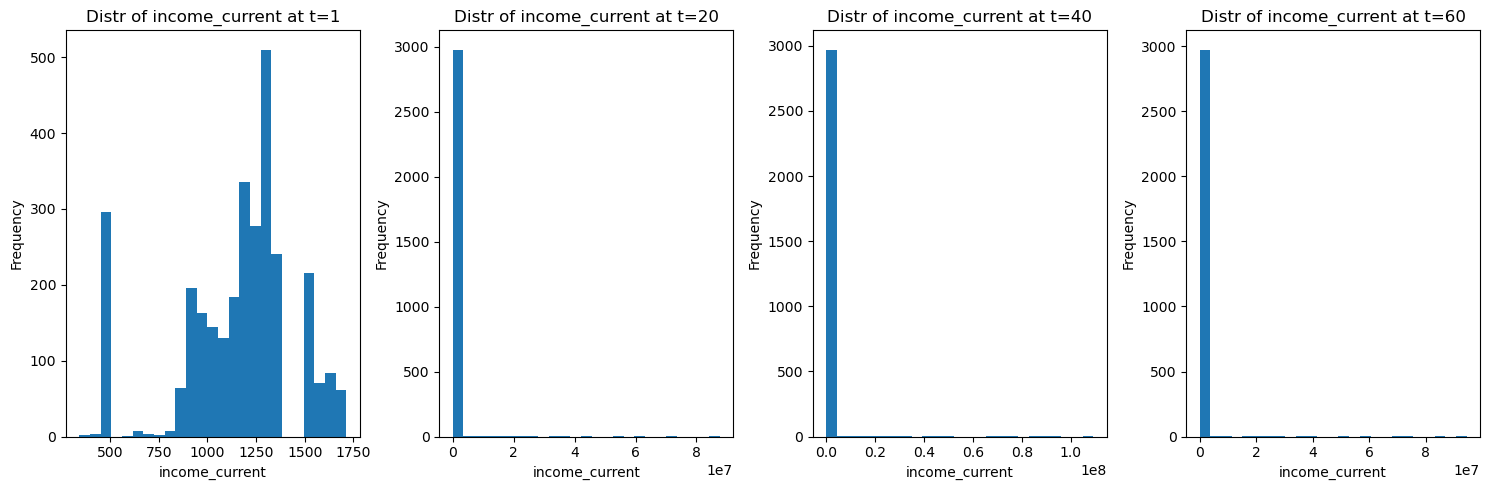

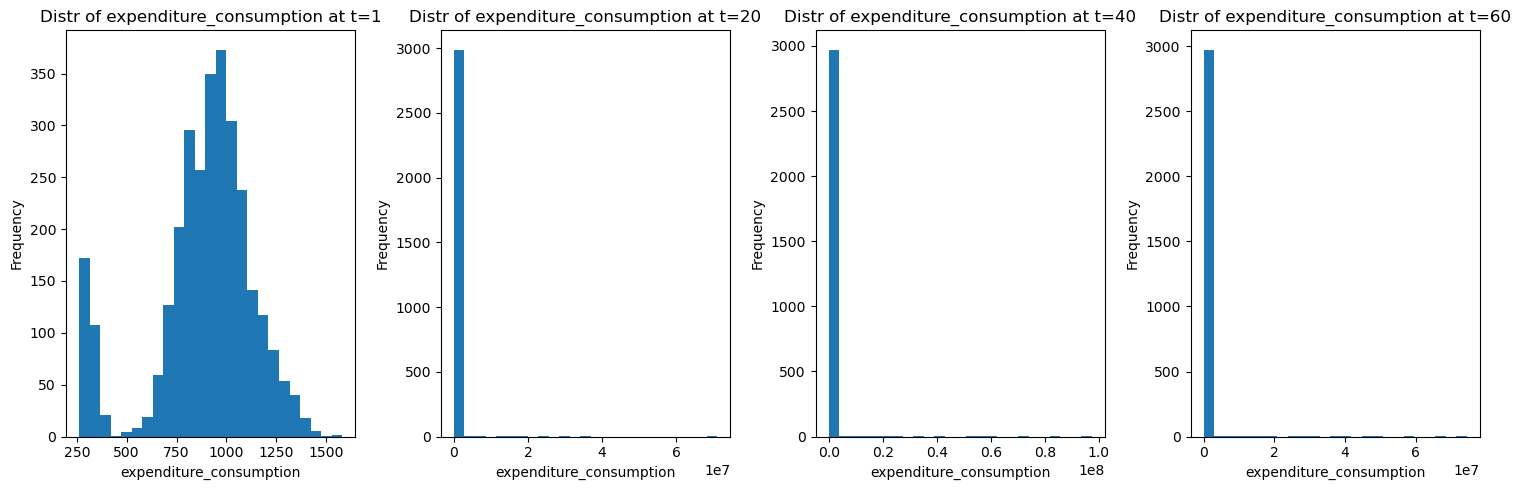

In [9]:
plot_histogram(households, [1, 20, 40, 60], [ 'income_current', "expenditure_consumption"])

#### Plots

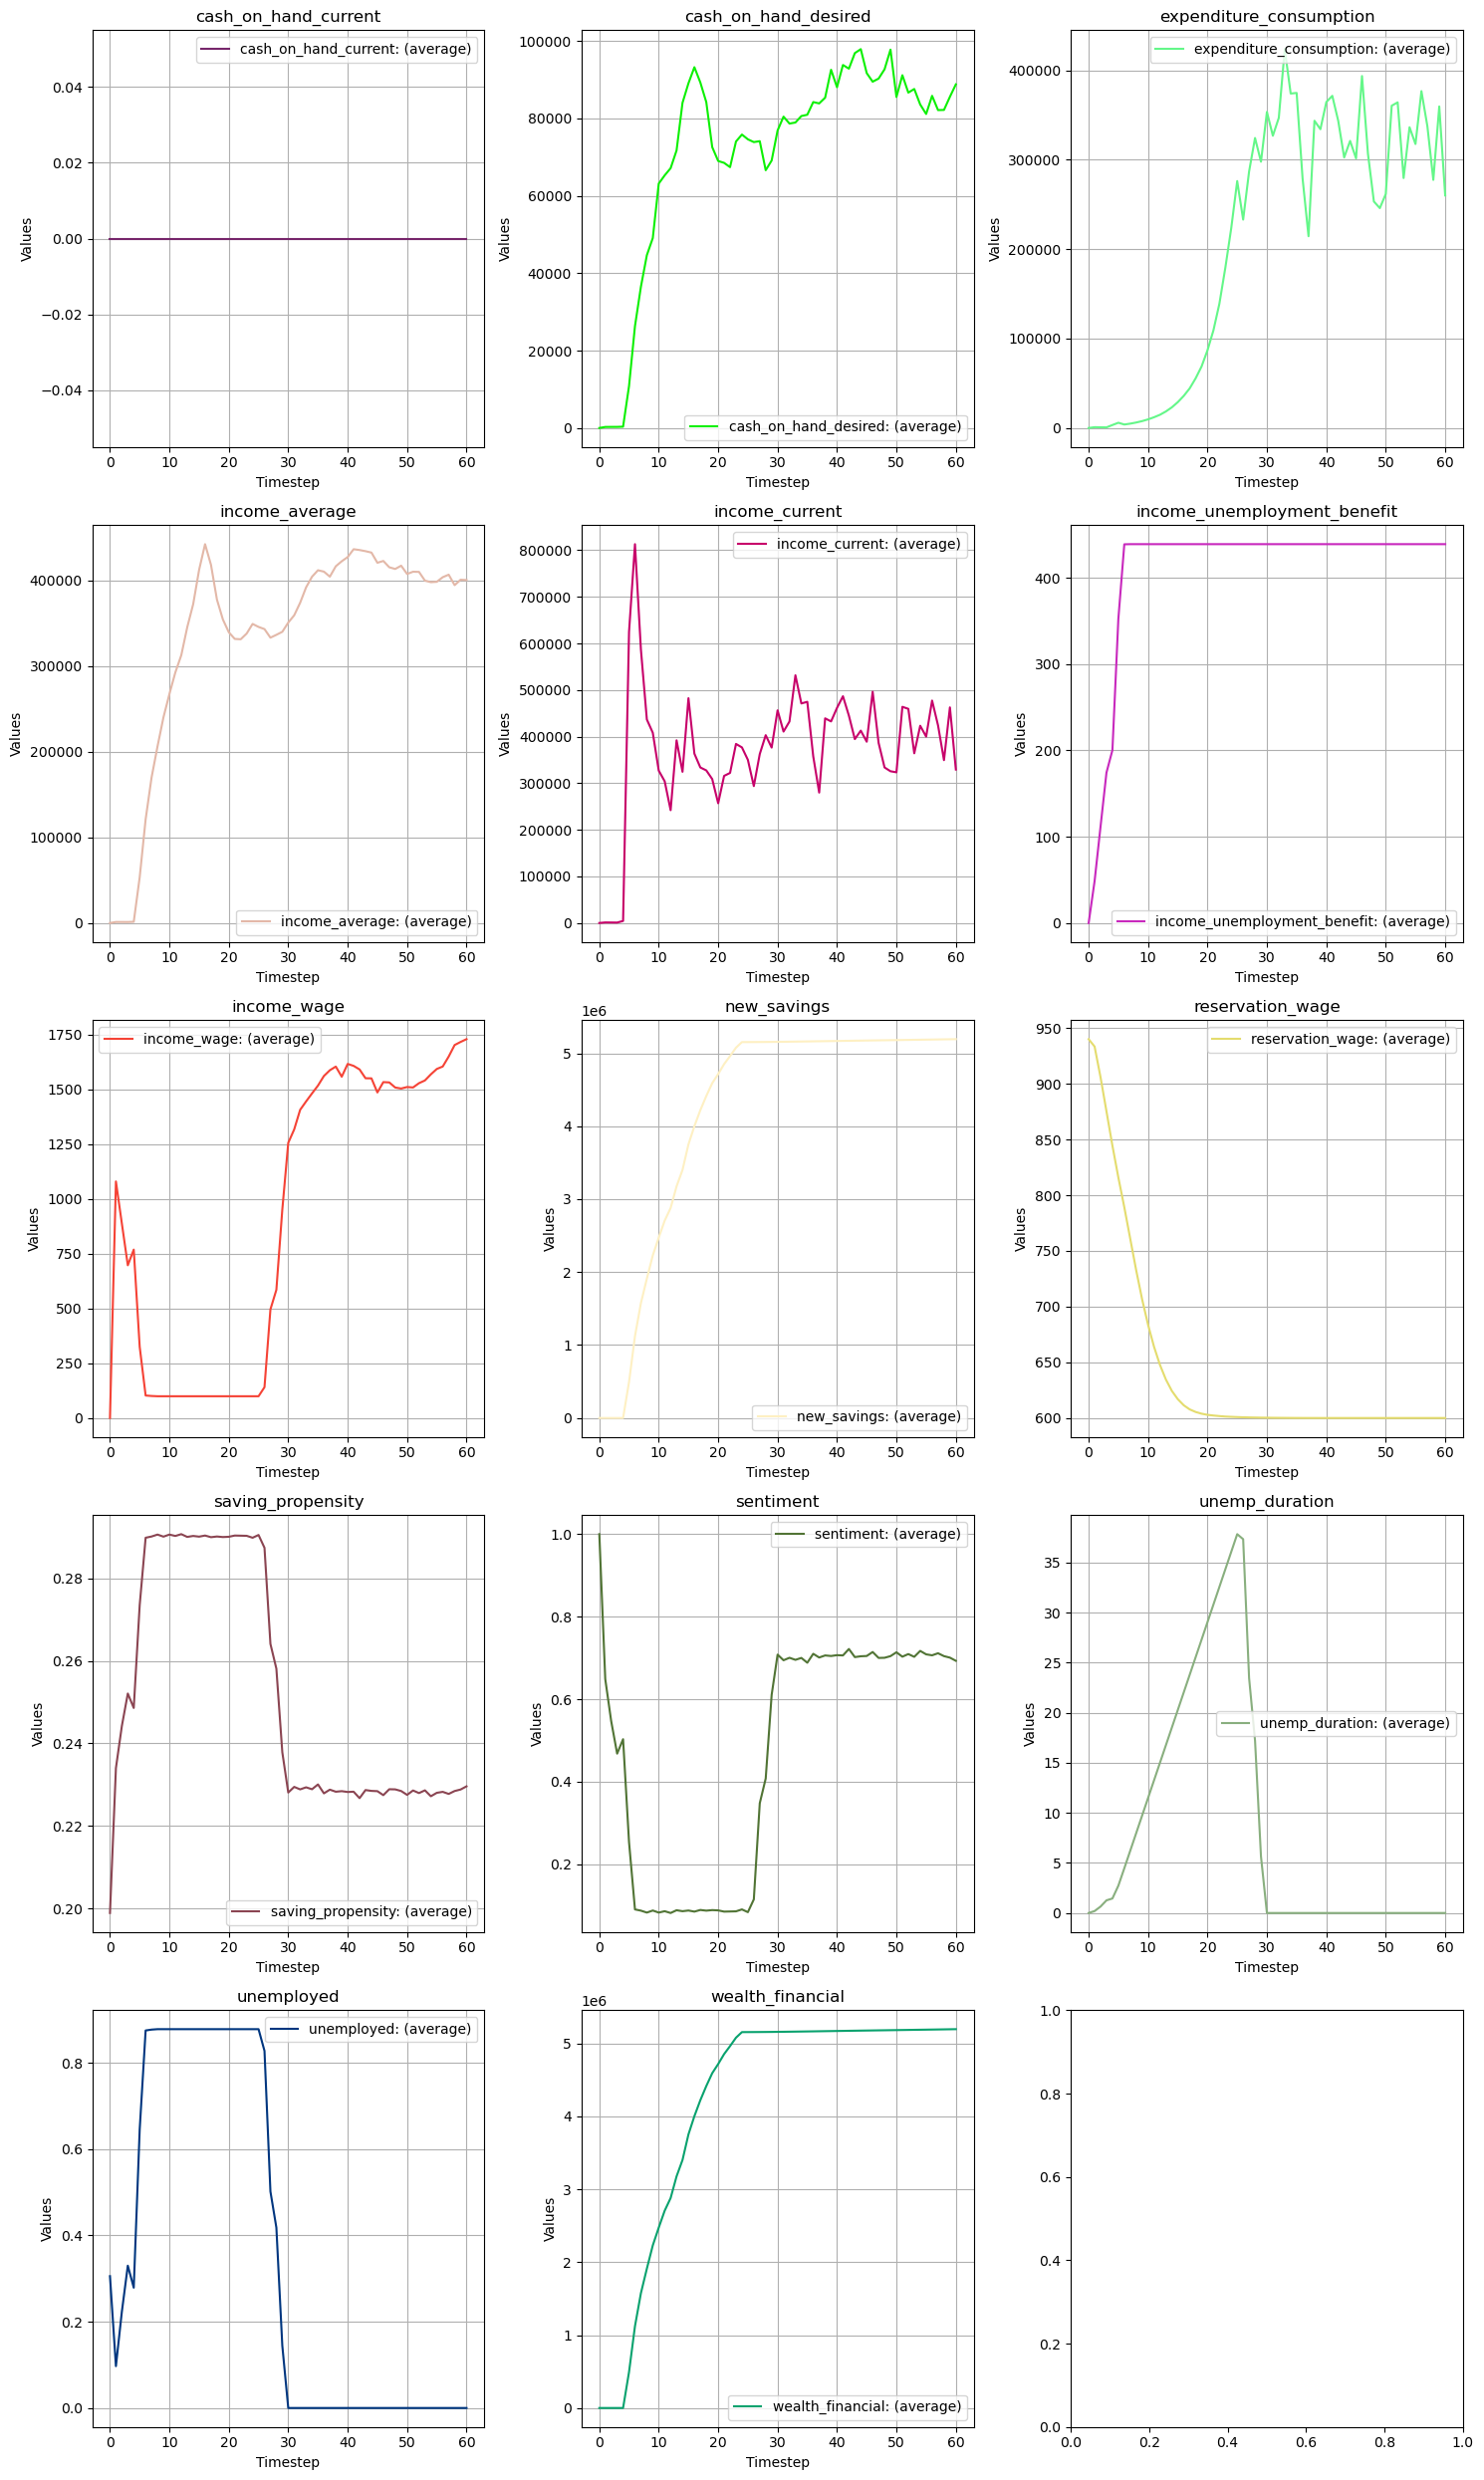

In [10]:
#cols_to_exclude = ['date']
#plot_values(households_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date', "c_f", "c_h", "c_excess_money", "wealth_human", "consumption_propensity","income_gov_transfers", "income_firm_owner_dividend", 
                   "expenditure_tax", "business_owner","cash_on_hand_real_desired",
                   "saving_propensity_optimist", "saving_propensity_pessimist", "p_majority_op_adoption", "unemp_duration_upper_bound"] 
plot_values(households_avg,t,True, cols_to_exclude)

###  Plot firms

In [11]:
cols_to_exclude = ['date',"subsidies", "dividend_ratio", "dividend_ratio_optimistic", "dividend_ratio_pessimistic", "production_past",
                   "is_cons_firm", "inventory_reaction_factor", "desired_labor_capacity_utilization"]

#### Plot Consumer Firms

------ Plotting consumer firms -----


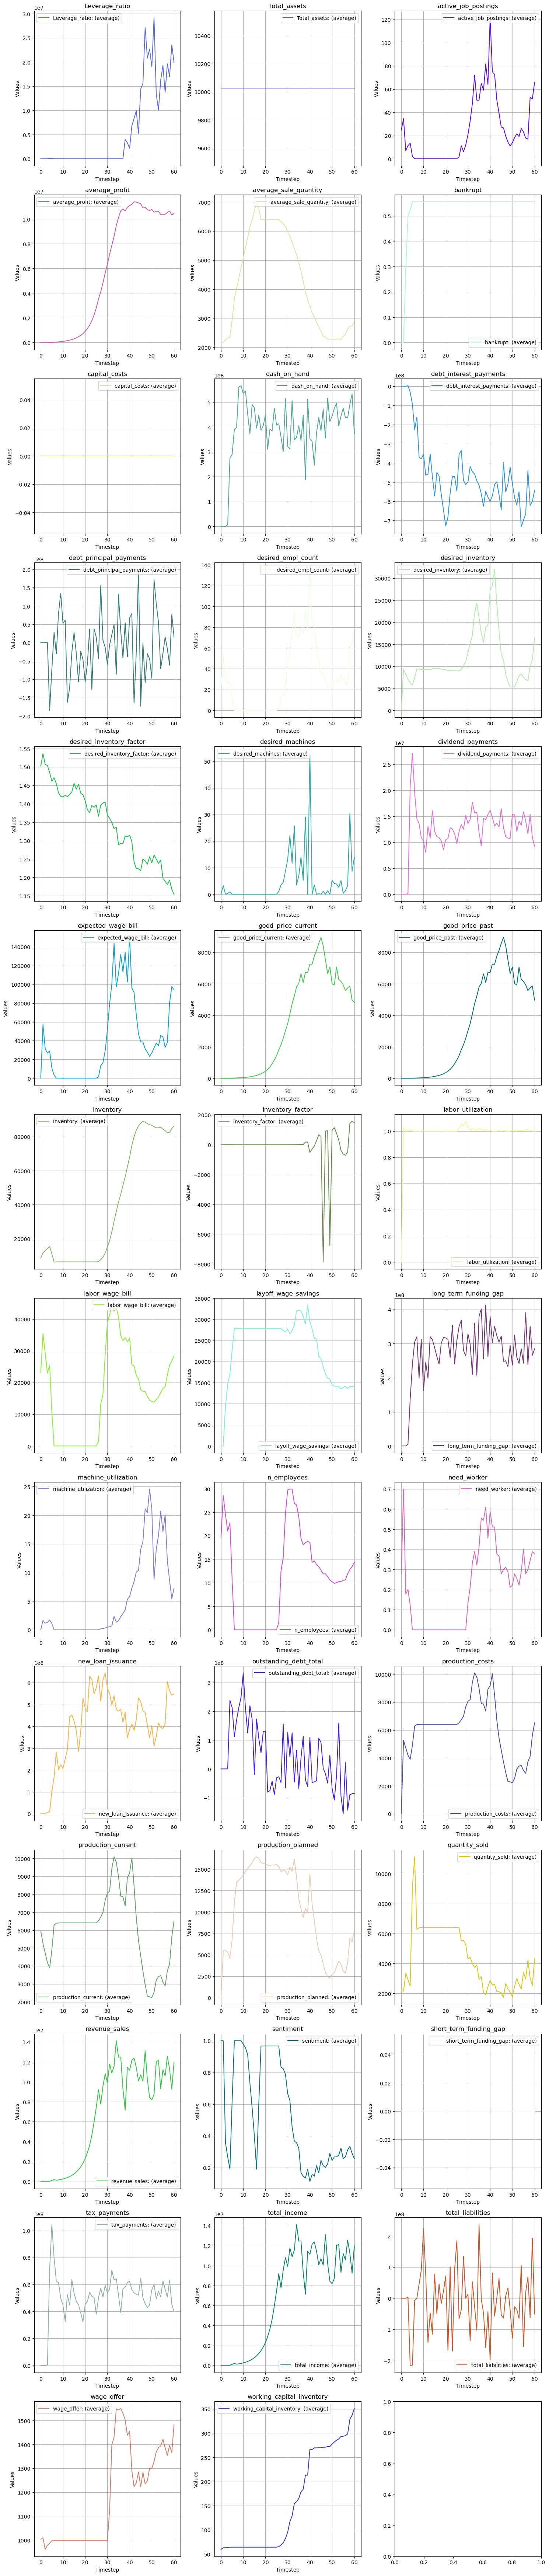

In [12]:
print("------ Plotting consumer firms -----")
#plot_values(cons_firms_sum,t,False, cols_to_exclude)

plot_values(cons_firms_avg,t,True, cols_to_exclude)

#### Histogram for Consumer Firms

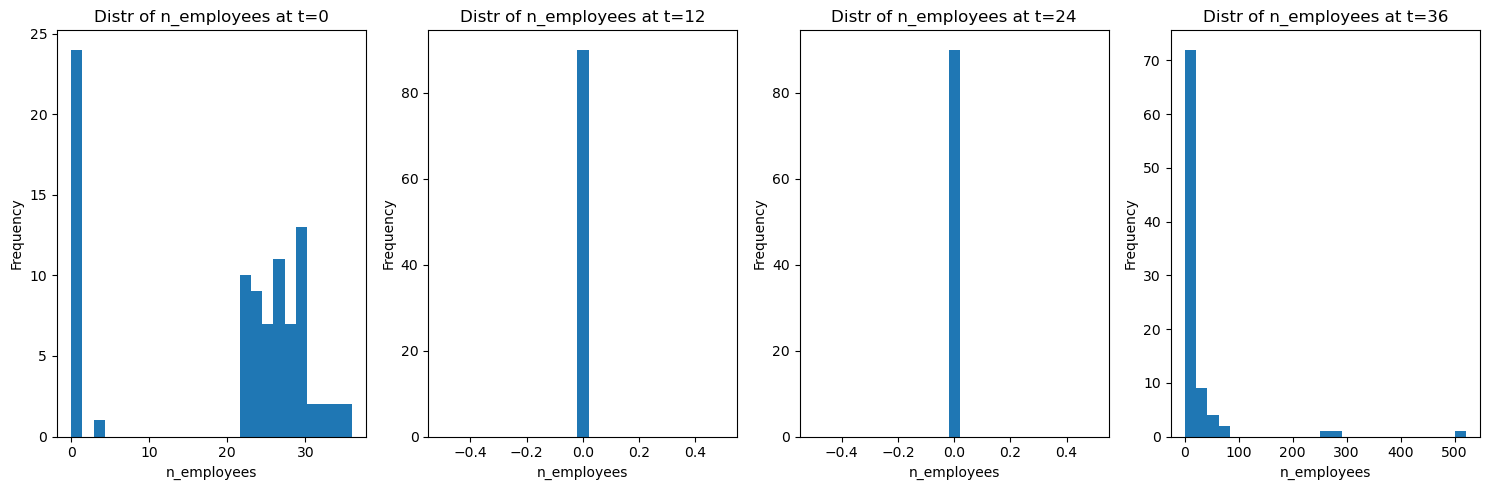

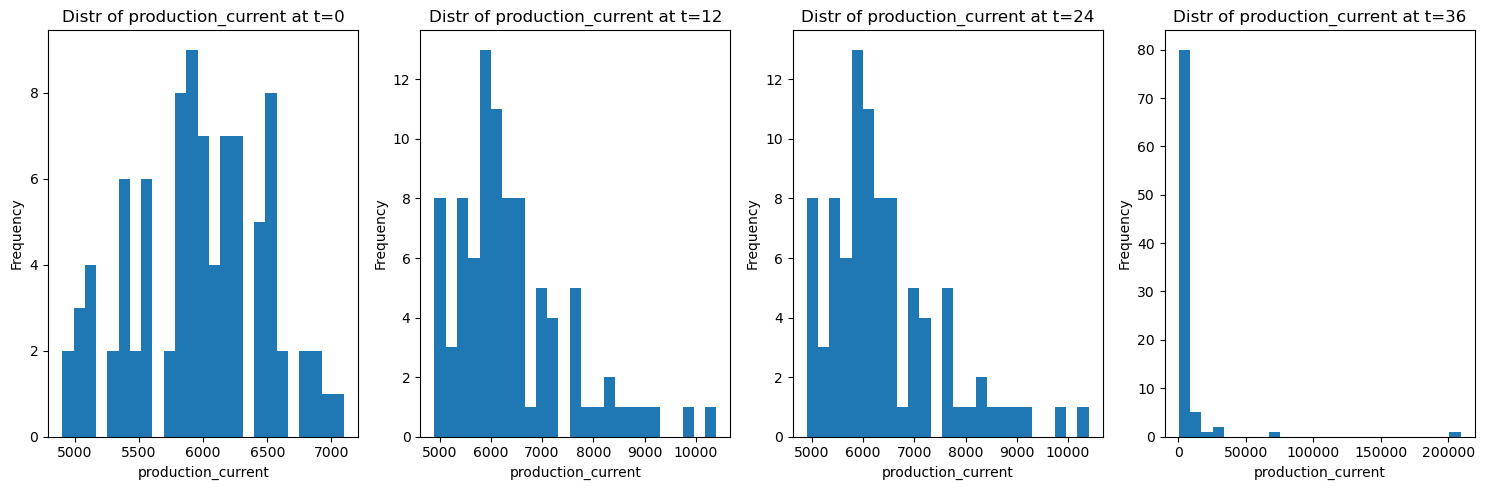

In [13]:
plot_histogram(cons_firms, [0, 12, 24, 36], [ 'n_employees', 'production_current'])

### Capital Firms

------ Plotting capital firms -----


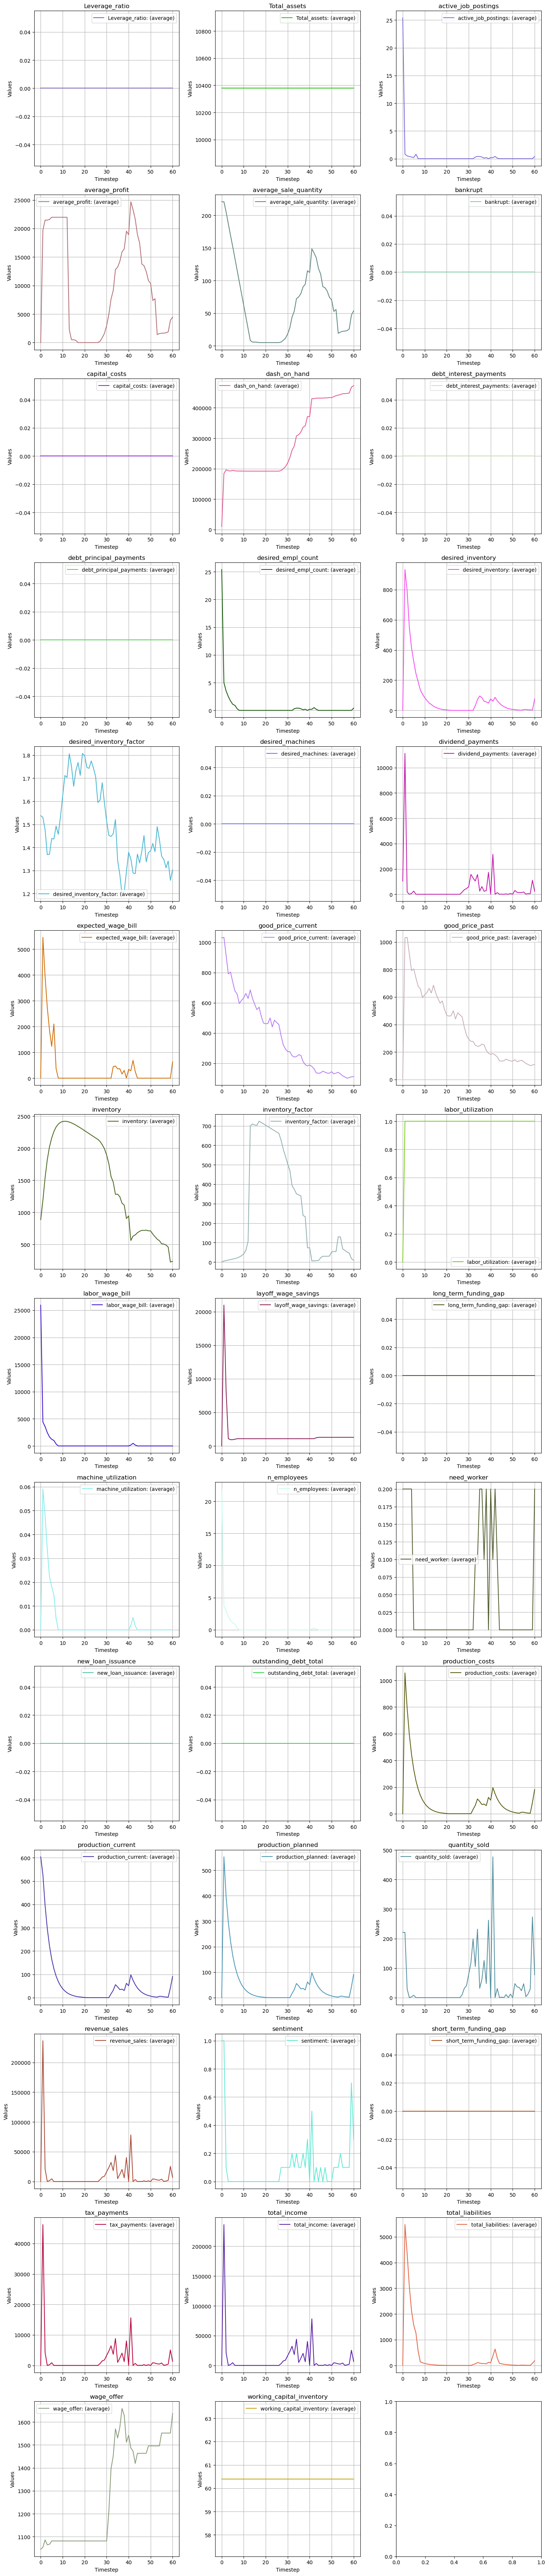

In [14]:
print("------ Plotting capital firms -----")
plot_values(cap_firms_avg,t,True, cols_to_exclude)

### Print Public Board

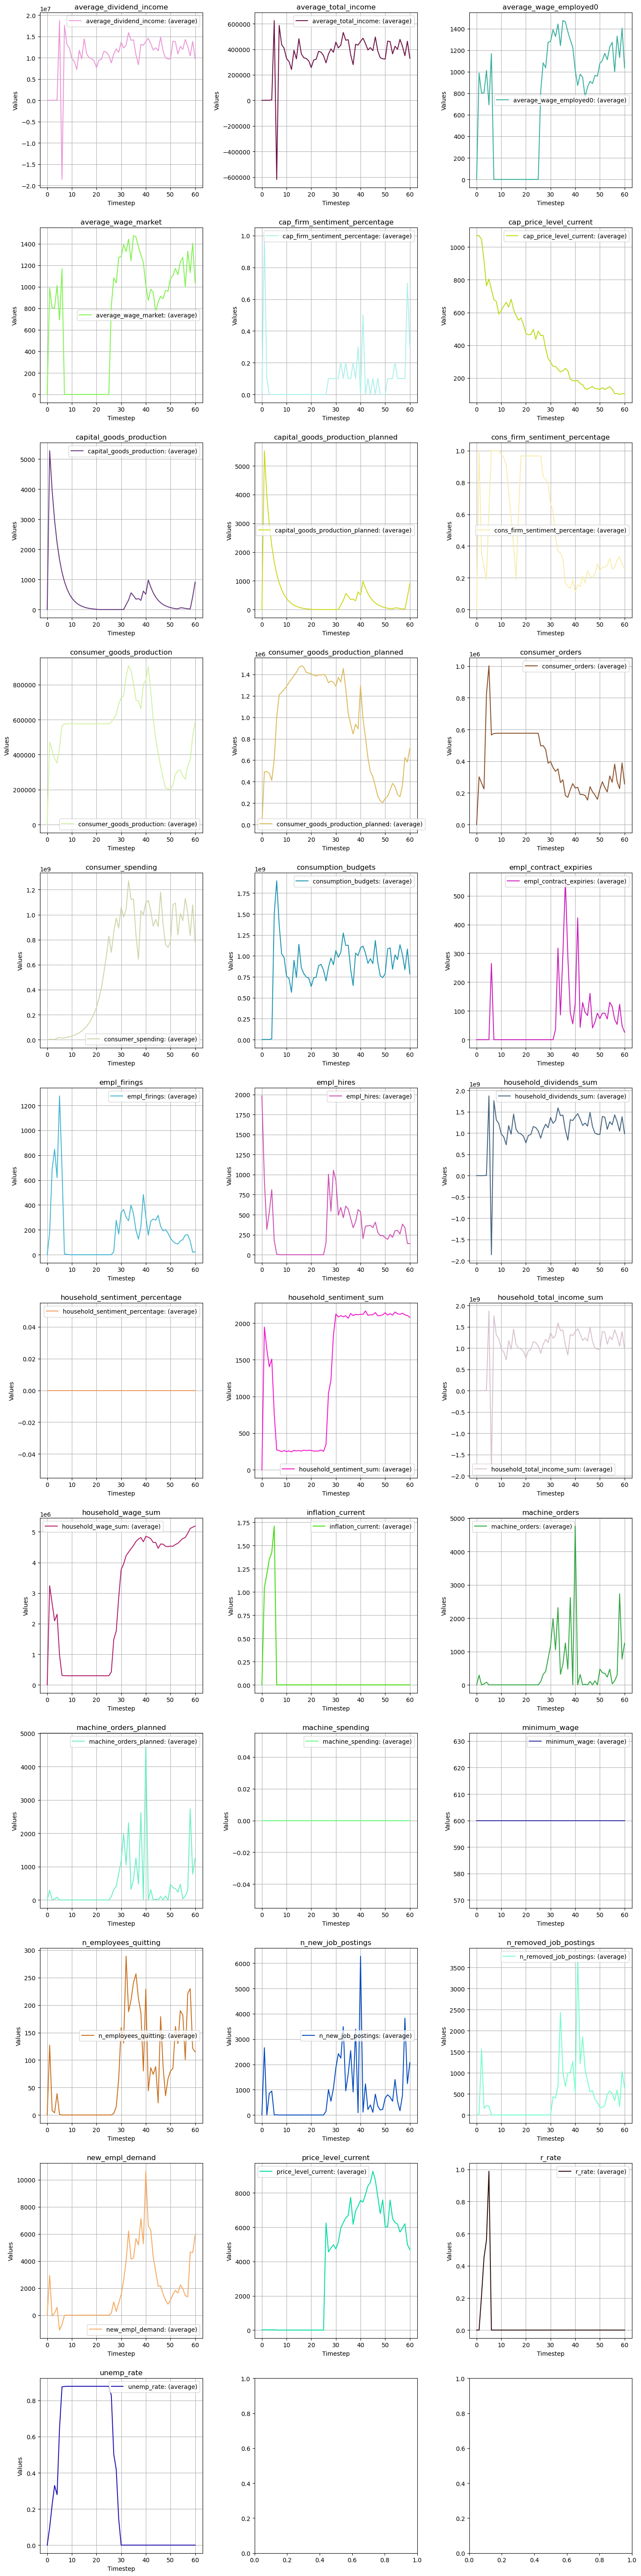

In [15]:
cols_to_exclude = ['date', "price_level_previous","cap_price_level_previous","n_employed", "n_unemployed", "cap_firm_sentiment_sum", 
                "cons_firm_sentiment_sum", "unempl_benefits"]
plot_values(pboard,t,True, cols_to_exclude)

To do: